## Main Mega Project File
Pada file ini, kita akan melakukan beberapa hal terhadap data yang sudah kita scrapping. Data yang akan digunakan adalah data dari twit sebanyak 20000 dari twitter menggunakan api twint. 20000 baris data tersebut merupakan data dengan kandungan kata "muslim" dan merupakan 20000 twit terakhir.

### Data Cleaning
Pada bagian ini data akan dibersihkan sesuai kebutuhan projek.

In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import itertools
import collections

warnings.filterwarnings('ignore')
%matplotlib inline

sns.set_style("whitegrid")

In [2]:
def drop_columns(df):
    base_col = [
        'created_at', 
        'date', 
        'time', 
        'username', 
        'tweet', 
        'language', 
        'replies_count', 
        'retweets_count',
        'likes_count',
        'hashtags',
        'user_id',
        'conversation_id'
        
    ]
    drop_col = diff(df.columns, base_col)
    df_drop = df.drop(drop_col, axis = 1)
    return df_drop

In [3]:
def diff(list1, list2):
    c = set(list1).union(set(list2))  # or c = set(list1) | set(list2)
    d = set(list1).intersection(set(list2))  # or d = set(list1) & set(list2)
    return list(c - d)

In [4]:
def en_only(df):
    df_en = df[df['language'] == 'en']
    return df_en

In [5]:
def created_at_split(df):
    df_splitted = df.copy()
    df_splitted['region'] = df_splitted['created_at'].apply(lambda x : x.split()[2])
    return df_splitted

In [6]:
def pipeline(df):
    df = drop_columns(df)
    df = en_only(df)    
    df = created_at_split(df)
    return df

In [7]:
def highest_tweets(df_copy, col, limit):
    df_copy_sum = pd.DataFrame(df_copy.groupby('username')[[col, 'user_id']].sum()).sort_values(by = [col], ascending = False)
    
    highest_tweet = df_copy_sum.iloc[:limit]

    sns.barplot(data = highest_tweet, y = highest_tweet.index, x = col, orient = 'h')
    
    return highest_tweet

In [8]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [39]:
def words_count(df):
    words = []
    
    #menghapus segala bentuk huruf yang tidak diinginkan
    df['tweet'] = df['tweet'].apply(lambda x : remove_url(x))

    
    #mengubah tiap kata pada tweet menjadi huruf kecil
    df['tweet'] = df['tweet'].apply(lambda x : x.lower())
    
    #melakukan splitting word pada tiap tweet 
    words.append(df_copy['tweet'].apply(lambda x : x.split()))
    
    words = list(np.array(words).flatten())
    
    all_words = itertools.chain(*words)
    
    count_worlds = collections.Counter(all_words)
    
    return count_worlds


In [10]:
cwd = os.getcwd()
data_path = os.path.join(cwd, 'databases', 'store_twit_muslim.csv')

df = pd.read_csv(data_path)
df_copy = df.copy()

df_copy.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.620000e+18,1.620000e+18,2023-02-10 19:59:36 SE Asia Standard Time,2/10/2023,19:59:36,700,1.400000e+18,bmidou124,SriVaishnava Alucard (परकालरामानुजदासन),NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1.620000e+18,1.620000e+18,2023-02-10 19:59:34 SE Asia Standard Time,2/10/2023,19:59:34,700,6.535429e+07,khasbaat,arijit ghosh,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1.620000e+18,1.620000e+18,2023-02-10 19:59:33 SE Asia Standard Time,2/10/2023,19:59:33,700,1.060000e+18,vasudaiva,Vasudaiva_Kutumbakam 🕉️🛕🪷🐅,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'zafshee2', 'name': 'SheenA Z...",NaN,NaN,NaN,NaN
3,1.620000e+18,1.620000e+18,2023-02-10 19:59:30 SE Asia Standard Time,2/10/2023,19:59:30,700,8.590000e+17,mr_muslim511,Slim,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1.620000e+18,1.620000e+18,2023-02-10 19:59:29 SE Asia Standard Time,2/10/2023,19:59:29,700,1.620000e+18,rajeshc40075742,Rajesh ch,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'bandisanjay_bjp', 'name': 'B...",NaN,NaN,NaN,NaN


In [11]:
df_copy.shape

(20004, 36)

In [12]:
df_copy.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [13]:
df['language'].unique()

array(['en', 'et', 'in', 'ar', 'fr', 'tl', 'hi', 'sv', 'und', 'ps', 'ur',
       'kn', 'zxx', 'ro', 'cy', 'tr', 'qme', 'ja', 'de', 'ca', 'am', 'bn',
       'es', 'ht', 'ta', 'qam', 'da', 'fa', 'no', 'qht', 'pl', 'nl', 'pt',
       'gu', 'it', 'fi', 'art', 'te', 'qst', 'sl', 'is', 'mr', 'si', 'zh',
       'lv', 'ckb', 'cs', 'eu', 'lt', 'th'], dtype=object)

In [14]:
df[df.duplicated()]

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest


<AxesSubplot: xlabel='count', ylabel='language'>

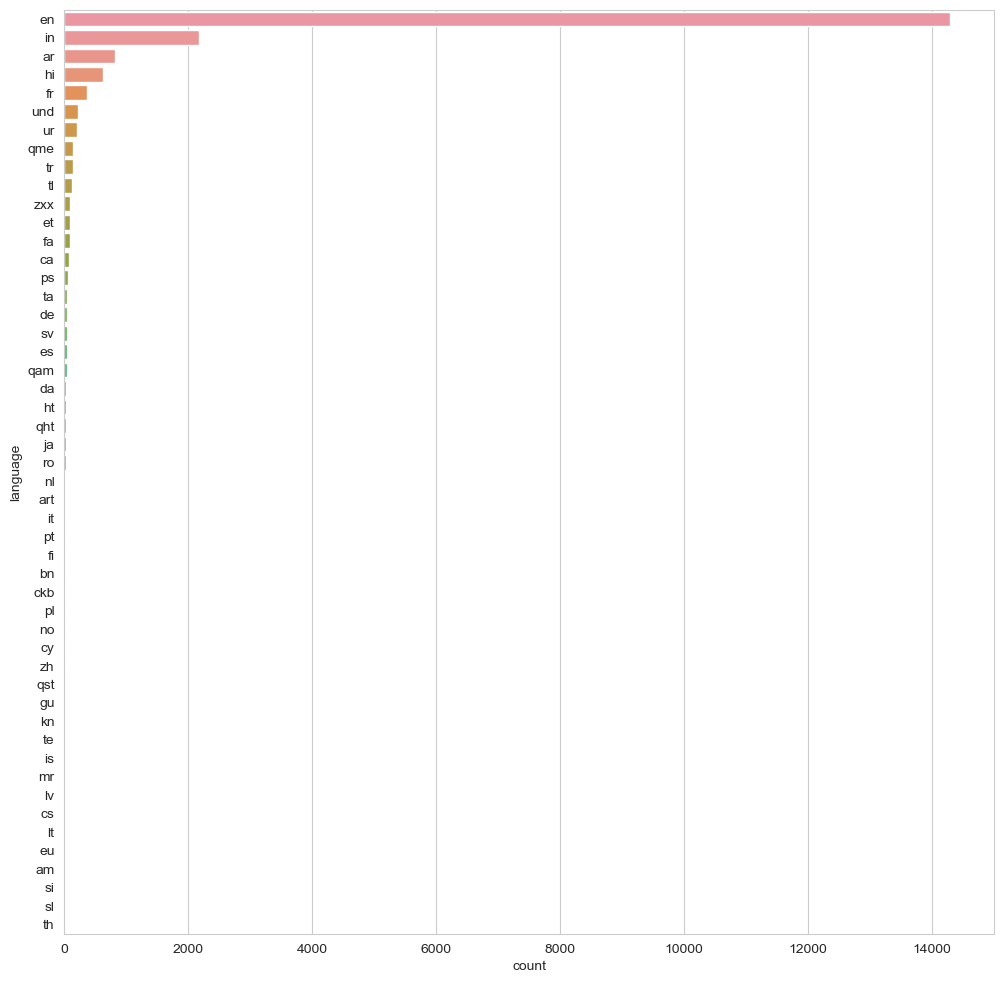

In [15]:
fig, ax = plt.subplots(1,1, figsize = (12,12))

sns.countplot(data = df, y = 'language', ax = ax, order = df['language'].value_counts().index)

Berdasarkan plot tersebut, kita mungkin hanya memerlukan bahasa en saja mengingat mungkin bahasa tersebut yang mungkin dapat dibaca. Selain itu, kedua bahasa tersebut menunjukkan banyak jumlah yang timpang dengan yang lain

In [16]:
df_copy = pipeline(df_copy)

In [17]:
print('kolom : {}'.format(df_copy.columns))

kolom : Index(['conversation_id', 'created_at', 'date', 'time', 'user_id', 'username',
       'tweet', 'language', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'region'],
      dtype='object')


In [18]:
df_copy.region.unique()

array(['SE'], dtype=object)

Berdasarkan informasi di atas, kita dapat mengetahui bahwa data tweet yang kita gunakan hanya terdiri dari user yang ada di southeast

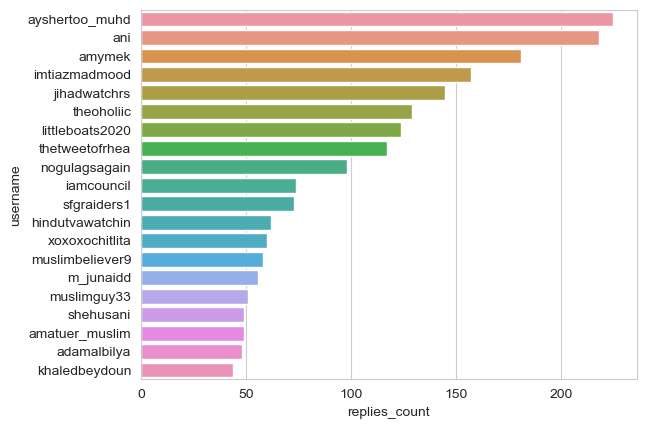

In [19]:
top_user_id = []

top_user_id.append(highest_tweets(df_copy, 'replies_count', 20))

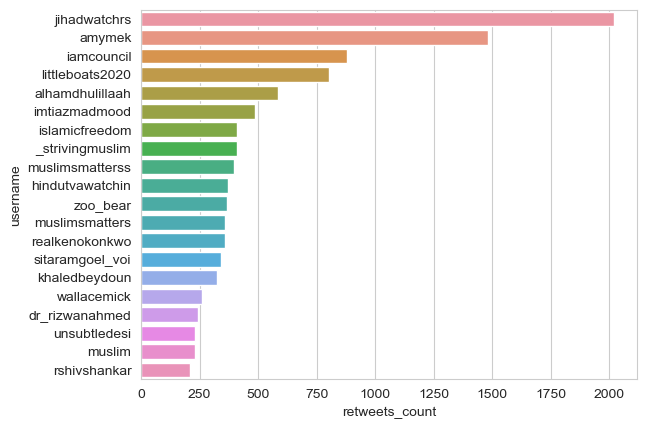

In [20]:
top_user_id.append(highest_tweets(df_copy, 'retweets_count', 20))


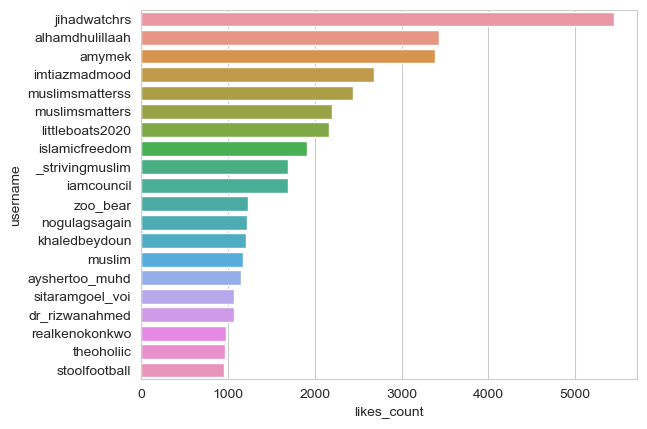

In [21]:
top_user_id.append(highest_tweets(df_copy, 'likes_count', 20))


In [22]:
df['username'].nunique(), df['user_id'].nunique()

(13431, 4408)

In [23]:
df[df['user_id'] == df['user_id'][0]].username.value_counts()

_elonmuslim        9
setiawa98888547    6
gatty_gautham      6
shakeshakabrah     4
sonsuzs06563724    3
                  ..
tweetwitharsh      1
kamuyanganjing     1
itanveerhussain    1
mozatoelygaya      1
meenat30           1
Name: username, Length: 124, dtype: int64

In [40]:
all_words = words_count(df_copy)
all_words.most_common()

[('the', 14240),
 ('to', 9554),
 ('and', 9240),
 ('muslim', 8363),
 ('of', 8277),
 ('a', 7474),
 ('in', 6442),
 ('is', 6235),
 ('muslims', 6010),
 ('you', 4837),
 ('are', 4296),
 ('that', 3655),
 ('for', 3600),
 ('i', 3514),
 ('not', 3034),
 ('it', 2907),
 ('they', 2585),
 ('be', 2427),
 ('this', 2418),
 ('with', 2219),
 ('as', 2177),
 ('on', 2063),
 ('have', 2016),
 ('but', 1936),
 ('all', 1931),
 ('was', 1797),
 ('who', 1710),
 ('he', 1672),
 ('we', 1663),
 ('by', 1615),
 ('from', 1603),
 ('if', 1552),
 ('your', 1527),
 ('or', 1507),
 ('people', 1499),
 ('so', 1463),
 ('their', 1430),
 ('will', 1407),
 ('amp', 1399),
 ('its', 1385),
 ('about', 1366),
 ('dont', 1313),
 ('like', 1300),
 ('allah', 1295),
 ('do', 1285),
 ('islam', 1220),
 ('what', 1199),
 ('no', 1173),
 ('them', 1093),
 ('just', 1062),
 ('my', 1033),
 ('why', 982),
 ('one', 963),
 ('his', 958),
 ('has', 937),
 ('when', 930),
 ('at', 915),
 ('how', 914),
 ('more', 898),
 ('there', 898),
 ('can', 880),
 ('were', 864),
 ('a